### Feature Enginering
---

outlier treatment by using winsorization
- one hot encoding
- log10 transformation
- scaling
- filtering or feature selection


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", font_scale=1.2)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/My Drive/intermediate/data.csv", skipfooter=1, engine = 'python')

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

In [5]:
num =  df.select_dtypes(include=np.number).columns
cata =  df.select_dtypes(exclude=np.number).columns

In [6]:
df.head(3)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [7]:
df.tail(3)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1929933,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929934,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929935,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


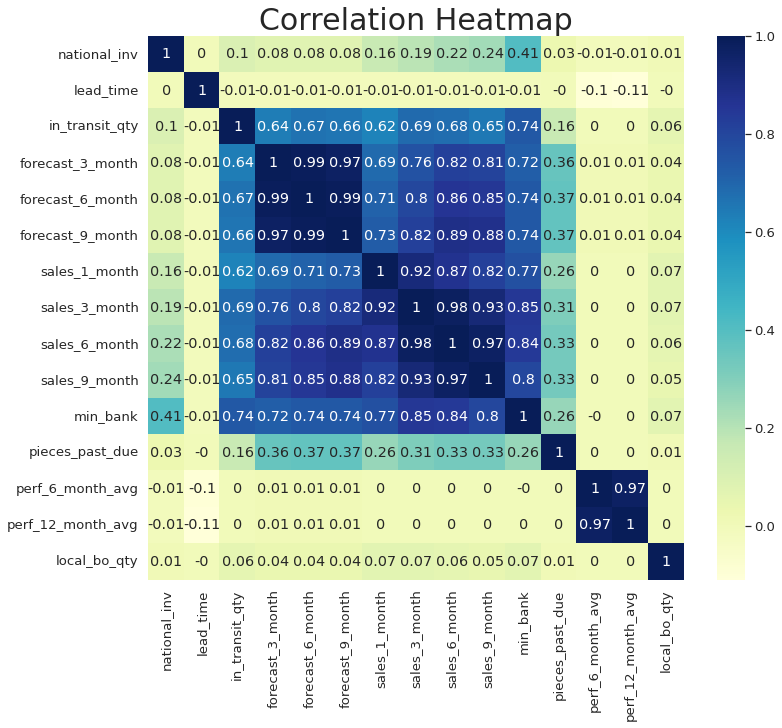

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(round(df.corr(),2),annot=True,cmap= "YlGnBu")
plt.title("Correlation Heatmap",size=30)
plt.show()

In [9]:
cata

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

### Encoding
---

In [10]:
df['potential_issue']= df['potential_issue'].replace(["Yes", "No"],[1,0])
df['deck_risk']= df['deck_risk'].replace(["Yes", "No"],[1,0])
df['oe_constraint']= df['oe_constraint'].replace(["Yes", "No"],[1,0])
df['ppap_risk']= df['ppap_risk'].replace(["Yes", "No"],[1,0])
df['stop_auto_buy']= df['stop_auto_buy'].replace(["Yes", "No"],[1,0])
df['rev_stop']= df['rev_stop'].replace(["Yes", "No"],[1,0])
df['went_on_backorder']= df['went_on_backorder'].replace(["Yes", "No"],[1,0])

In [11]:
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929931,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1929932,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1929933,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1929934,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Missing Value Treatment
---

In [12]:
df.isnull().sum()

national_inv              1
lead_time            115618
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [13]:
df = df.fillna(df.median())

In [14]:
df.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

### Transformation of Data
---

In [15]:
df.skew().sort_values(ascending = False)

pieces_past_due      414.270099
national_inv         340.220810
sales_1_month        193.720073
in_transit_qty       168.980118
local_bo_qty         149.620957
forecast_3_month     142.782800
forecast_9_month     142.683742
sales_3_month        141.814016
sales_6_month        138.927047
forecast_6_month     138.818011
sales_9_month        135.435734
min_bank             130.962646
oe_constraint         81.279642
rev_stop              47.930004
potential_issue       44.140740
went_on_backorder     11.620990
lead_time              4.696201
ppap_risk              2.331514
deck_risk              1.312782
perf_6_month_avg      -3.173342
perf_12_month_avg     -3.295185
stop_auto_buy         -4.939219
dtype: float64

In [16]:
df["pieces_past_due"] = np.log10(df["pieces_past_due"]+1)
df["national_inv"] = np.log10(df["national_inv"]+1)
df["sales_1_month"] = np.log10(df["sales_1_month"]+1)
df["in_transit_qty"] = np.log10(df["in_transit_qty"]+1)
df["forecast_3_month"] = np.log10(df["forecast_3_month"]+1)
df["forecast_9_month"] = np.log10(df["forecast_9_month"]+1)
df["sales_3_month"] = np.log10(df["sales_3_month"]+1)
df["sales_6_month"] = np.log10(df["sales_6_month"]+1)
df["forecast_6_month"] = np.log10(df["forecast_6_month"]+1)
df["sales_9_month"] = np.log10(df["sales_9_month"]+1)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Feature Selection
---

In [17]:
# Calculate correlation of variables
correlation = df.corr()

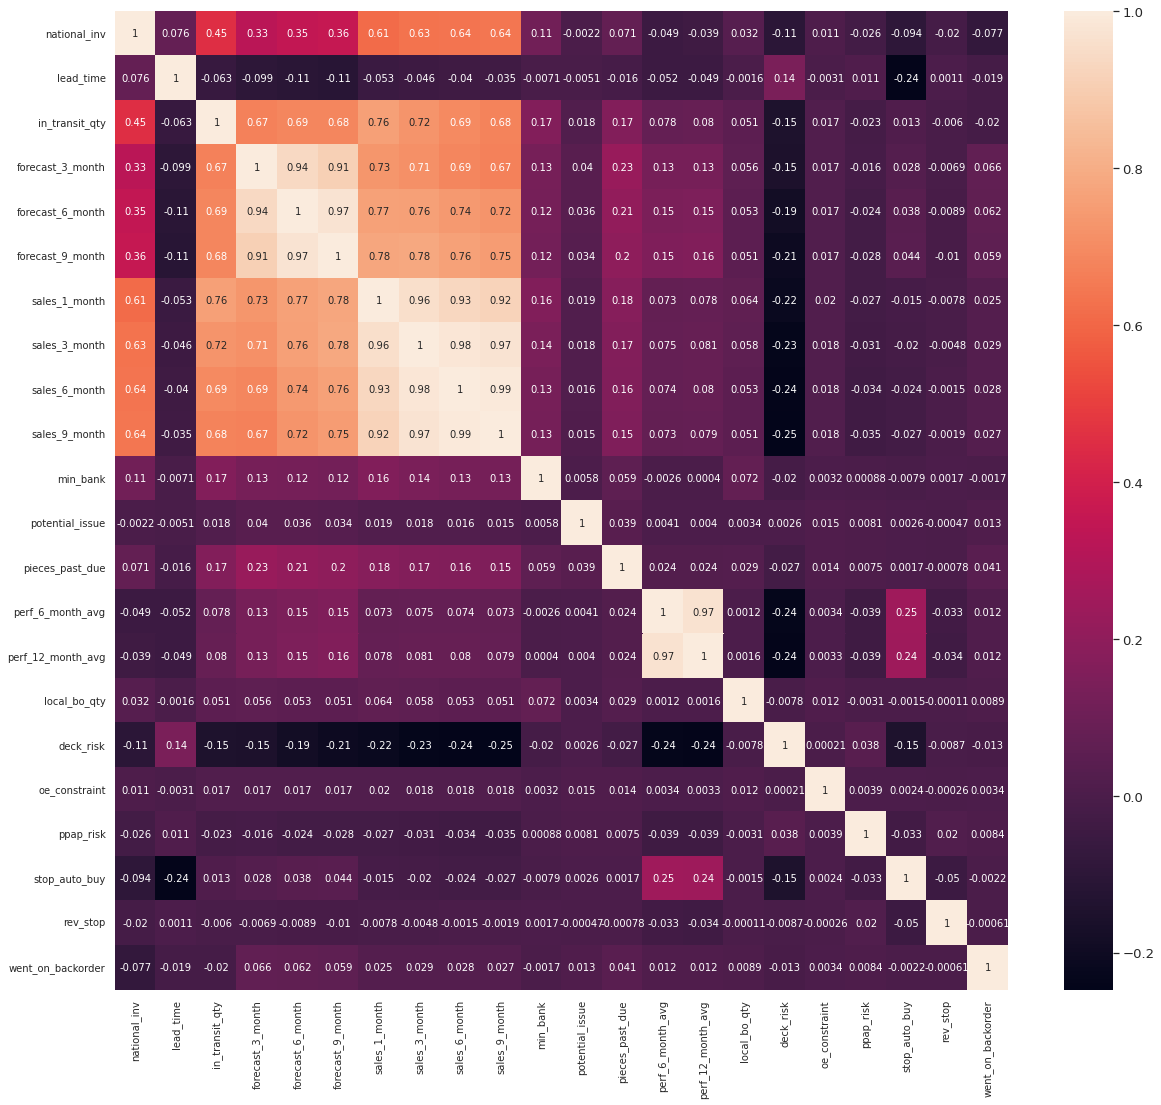

In [18]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [19]:
final_df = df.drop(columns=['forecast_6_month',
 'forecast_9_month',
 'perf_12_month_avg',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month'])

In [20]:
final_df

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_1_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.477121,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.477121,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.903090,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.954243,8.0,0.0,0.0,0.0,2.0,0.0,0.0,-99.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929931,1.113943,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.48,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1929932,1.146128,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.48,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1929933,1.146128,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.48,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1929934,1.041393,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.48,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Outlier Removal & Data Split
---

In [21]:
import scipy.stats as stats
#find Q1, Q3, and interquartile range for each column
def outlier_remove(x):
    """
    function to remove the outlier
    from our dataset by using of 
    interquartile ranges"""
    Q1 = x.quantile(q=.25)
    Q3 = x.quantile(q=.75)
    IQR = x.apply(stats.iqr)
    #only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
    cd = x[~((x < (Q1-1.5*IQR)) | (x > (Q3+1.5*IQR))).any(axis=1)]
    #find how many rows are left in the dataframe 
    return cd

In [22]:
fi = outlier_remove(final_df)

In [23]:
fi

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_1_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,0.477121,9.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.99,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.146128,8.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.82,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.698970,8.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.82,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.000000,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.91,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15,1.079181,8.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.82,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929909,1.204120,4.0,0.0,0.0,0.477121,4.0,0.0,0.0,0.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1929911,1.079181,4.0,0.0,0.0,0.477121,0.0,0.0,0.0,0.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1929917,1.792392,4.0,0.0,0.0,0.301030,3.0,0.0,0.0,0.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1929918,0.602060,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
def data_split(data: pd.DataFrame, frac = 0.2, trainpath= str, testpath=str):
    """
    """
    test = data.sample(frac = frac, axis = 0)
    train = data.drop(index=test.index)
    train.to_csv(trainpath)
    test.to_csv(testpath)

In [25]:
train_path ="/content/drive/My Drive/intermediate/train.csv"
test_path ="/content/drive/My Drive/intermediate/test.csv"
data_split(fi, trainpath=train_path, testpath= test_path)